Task : 

Collect the Iris dataset either from online or from scikit learn itself. The task is to cluster the flower species (setosa, versicolor, virginica) without using the labels. Use K-Means, Hierarchical & DBSCAN algorithms


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Iris dataset
df_iris=sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Access the features and target variable
# Selecting only the numerical columns for clustering 
X=df_iris.drop(columns=['species'],axis=1)
Y=df_iris['species']  # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)

K-Means Clustering

In [5]:
# Standardize features
scaler=StandardScaler()
scaled_x=scaler.fit_transform(X)

#Finding the optimum number of clusters for k-means classification
wcss=[] 
for i in range(1,11): 
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(scaled_x)
    wcss.append(kmeans.inertia_)

knee_locator=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
optimal_K=knee_locator.elbow
print("Optimal number of clusters K :",optimal_K)

Optimal number of clusters K : 4


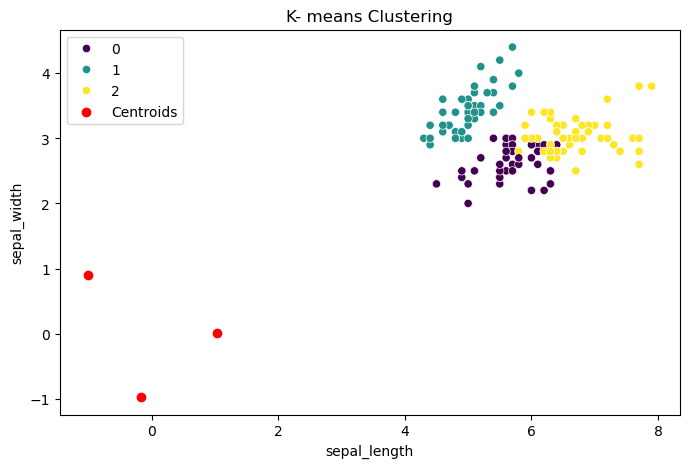

In [6]:
#Implementing K-Means Clustering
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(scaled_x)

#Visualising the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_iris['sepal_length'],y=df_iris['sepal_width'],hue=y_kmeans,palette='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',label='Centroids')
plt.title('K- means Clustering')
plt.legend()
plt.show()

In [7]:
# Clustering Evaluation
score=silhouette_score(scaled_x,y_kmeans)
print(score)

0.4565352255831264


Observation

Silhouette score is around 0.46, indicates relatively weak clustering there may be chances of overlapping.

Hierarchical Clustering

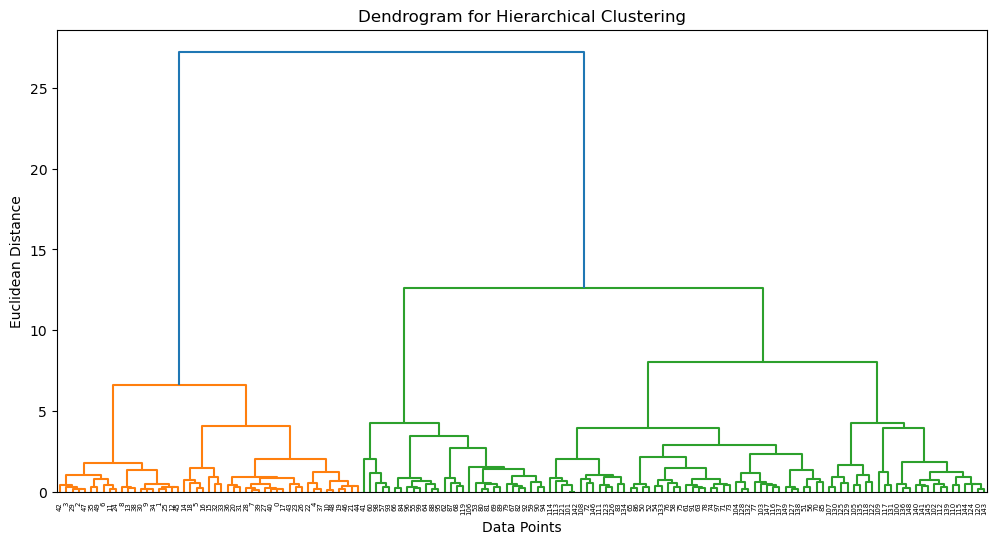

In [8]:
# Create and display the dendrogram
plt.figure(figsize=(12,6))
dendrogram=sch.dendrogram(sch.linkage(scaled_x,method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [9]:
# Find optimal number of clusters
from sklearn.metrics import silhouette_score
silhoutte=[] 
for i in range(2,10): 
    hc=AgglomerativeClustering(n_clusters=i,metric='euclidean',linkage='ward')
    label=hc.fit_predict(X)
    score=silhouette_score(X,label)
    silhoutte.append(score)

print(silhoutte)

[0.6867350732769781, 0.5543236611296426, 0.48896708575546993, 0.48438258927906036, 0.35923761926030906, 0.3422071936620507, 0.3435906599119543, 0.3304886352874666]


Observation : Optimal number of clusters is 2, as it has highest silhouette score 0.687. Silhouette score between the range 0.5-0.7 shows reasonably good clustering.

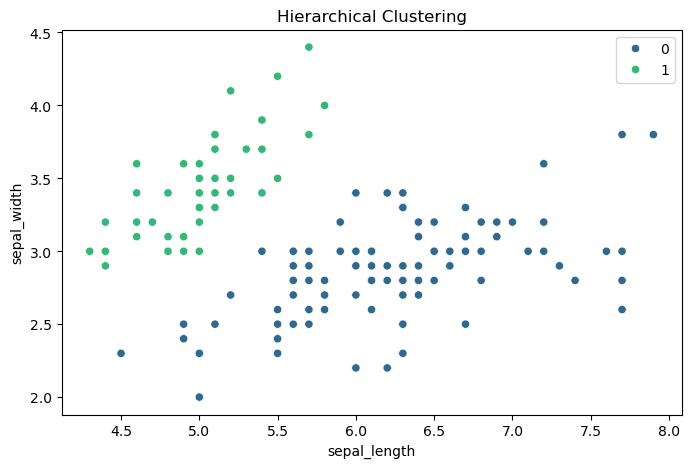

In [10]:
# Perform hierarchical clustering using the 'ward' linkage method
hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(scaled_x)


#Visualising the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_iris['sepal_length'],y=df_iris['sepal_width'],hue=y_hc,palette='viridis')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()

DBScan Clustering

In [11]:
# Find Min-sample size 
min_samples=2*X.shape[1]
print(min_samples)

8


Apply DBSCAN

In [95]:
# Sample size may vary from 4 to 6 for small data sets
dbscan=DBSCAN(eps=0.5,min_samples=4)
labels=dbscan.fit_predict(scaled_x)
print('Unique clusters :',np.unique(labels))

Unique clusters : [-1  0  1]


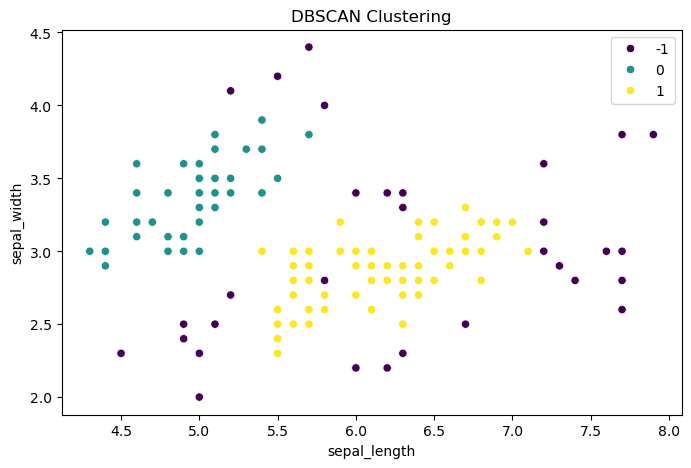

In [98]:
#Visualising the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_iris['sepal_length'],y=df_iris['sepal_width'],hue=labels,palette='viridis')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [99]:
#Silhouette_score
print(silhouette_score(scaled_x,labels))

0.36457435678297534


Observation: Silhouette score is between 0.25-0.5, indicates weak clustering that is there may be chances of overlapping of clusters.